In [11]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Rading the datasets
dfx = pd.read_csv("F:\MachineLearning CB\Challenge-1 Hardwork Pays Off\Training Data\Linear_X_Train.csv")
dfy = pd.read_csv("F:\MachineLearning CB\Challenge-1 Hardwork Pays Off\Training Data\Linear_Y_Train.csv")  
dfx_Test = pd.read_csv("F:\MachineLearning CB\Challenge-1 Hardwork Pays Off\Test Cases\Linear_X_Test.csv")

# Printing the shape of the dataset
print(dfx.shape)
print(dfy.shape)

(3750, 1)
(3750, 1)


In [13]:
# Converting dataframes into the nuumpy arrays
X = dfx.values
Y = dfy.values
X_test  = dfx_Test.values

In [56]:
# Normalizing the data
X = (X-X.mean())/X.std()

In [43]:
#Creating hypothesis function according the rule which will return the value of Y_Predicted
def hypothesis(x,theta):
    return(theta[0]+theta[1]*x)
   
"""Creating a function which will take the value of X and theta(already calculated) and will return an array...
...containing the predicted values according to given X and theta."""
def prediction(X,theta):
    m=X.shape[0]
    Y_Predicted=[]
    for i in range(m):
        y=hypothesis(X[i],theta)
        Y_Predicted.append(y)
    Y_Predicted=np.array(Y_Predicted)
    return(Y_Predicted)
    
"""Creating an error fucntion here according to the formula and returning the same.
We have created it to get the error value so we can save them in a list in order to plot the error graph."""
def get_error(X,Y,theta):
    error=0
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
    return(error)
    
"""Since the dataset is big, so we are using the minibatch method. Taking the batch size=30 and then...
...creating random examples of the batch size"""
def batch_gradient(X,Y,theta,batch_size=30):
    m=X.shape[0]
    #creates an array [0,1,2,.....,m-1]
    random_examples=np.arange(m)
    #this shuffles the values of array
    np.random.shuffle(random_examples)            
    #This creates an array of batch size containing random indexes
    random_examples=random_examples[:batch_size]  
    #creating gradient array and intializing it to zero
    grad=np.zeros((2,))                           
    for i in random_examples:
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])                        
        grad[1]+=(hx-Y[i])*X[i]
    return(grad)

    
def minibatch_gradient_descent(X,Y,batch_size=30,learning_rate=0.001):
    theta=np.zeros((2,))
    error_values=[]
    batches=int(X.shape[0]/batch_size)            #defining total number of batches here.
    for i in range(batches):
        grad=batch_gradient(X,Y,theta,batch_size=30)
        error=get_error(X,Y,theta)          
        error_values.append(error)             
        theta[0]-=learning_rate*grad[0]          
        theta[1]-=learning_rate*grad[1]
    return(theta,error_values)

In [49]:
theta,error_values = minibatch_gradient_descent(X,Y,30,0.001)

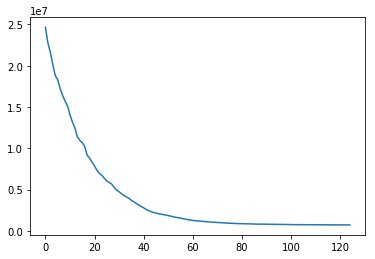

In [50]:
plt.plot(error_values)
plt.show()

In [70]:
print("The values of intercept and slope are")
print(theta)

The values of intercept and slope are
[ 0.57585083 78.30991907]


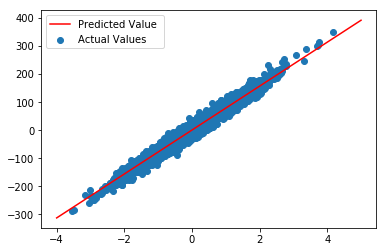

In [71]:
plt.scatter(X,Y,label="Actual Values")
#Creating some Xtest values in order to plot a line over the scatter plot to see how efficient our graph is
xt=np.arange(-4,6)                               
#Plotting the Line by predicting the values according to given and derived thetas.
plt.plot(xt,hypothesis(xt,theta),color='r',label="Predicted Value ") 
plt.legend() 
plt.show()


In [69]:
Y_Predicted_Values=prediction(X_test,theta)
print(Y_Predicted_Values)

[[-146.48582426]
 [ -67.47796818]
 [-197.56253008]
 ...
 [  10.60013294]
 [ -21.19725032]
 [ -52.70820941]]
